In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
traj_file = '/home/cloud/code/work/uta-rvl/pyrobot_recorder/armnavigation/n_joint_arm_to_point_control/trajectories/traj-0.csv'

In [3]:
data = np.genfromtxt(traj_file, delimiter=',')

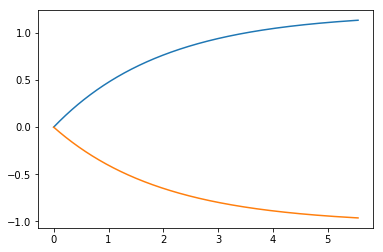

In [4]:
plt.plot(data[:, 0], data[:, 1:])
plt.show()

In [5]:
N = len(data)
tf = data[-1, 0]
samples = np.arange(N*tf)/N
sample_t = np.arange(N)/N
time = data[:, 0]

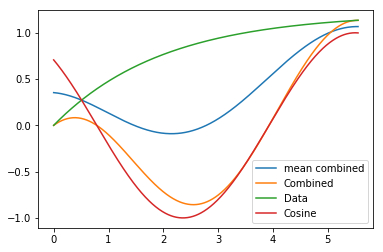

In [6]:
plt.plot(time, np.mean([np.cos(time+ np.pi/4), data[:, 1]], axis=0), label='mean combined')
plt.plot(time, np.cos(time+ np.pi/4)* data[:, 1], label='Combined')
plt.plot(time, data[:, 1], label='Data')
plt.plot(time, np.cos(time+ np.pi/4), label='Cosine')
plt.legend()
plt.show()

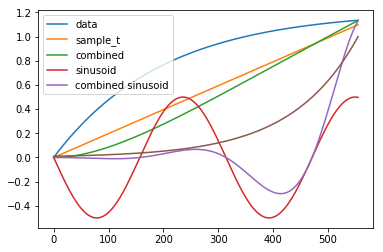

In [7]:
plt.plot(data[:, 1], label='data')
plt.plot(sample_t*1.1, label='sample_t')
plt.plot(data[:, 1] * sample_t, label='combined')
plt.plot(np.cos(time*2+ np.pi/2)*0.5, label='sinusoid')
plt.plot(2*data[:, 1]*np.geomspace(time[1], 1, len(time))*np.cos(time*2+ np.pi/2)*0.5, label='combined sinusoid')
plt.plot(np.geomspace(time[1], 1, len(time)))
plt.legend()
plt.show()

In [8]:
data = np.genfromtxt(traj_file, delimiter=',')

In [9]:
data[:, 2] = np.mean([np.cos(time+ np.pi/2), data[:, 2]], axis=0) + 1
data[:, 2] = np.cos(time+ np.pi/4)*2
data[:, 1] = np.geomspace(time[1], 1, len(time))#*np.cos(time*2+ np.pi/2)*0.5

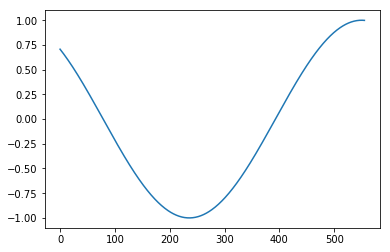

In [10]:
plt.plot(np.cos(time+ np.pi/4))
plt.show()

In [80]:
import armnavigation.n_joint_arm_to_point_control.n_joint_arm_to_point_control as m

In [81]:
m.show_animation = True
m.save_trajectories = False
m.save_screenshots_dir = None#'screenshots/'

20201020-162306
screenshots/


<Figure size 432x288 with 0 Axes>

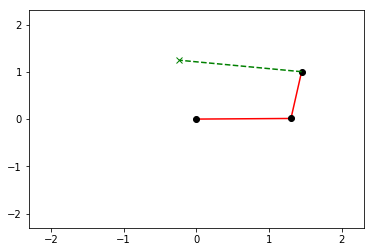

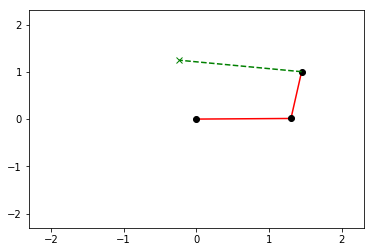

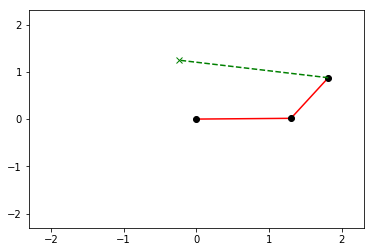

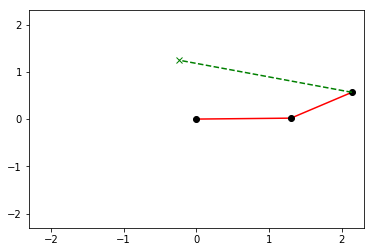

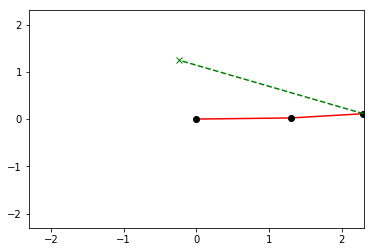

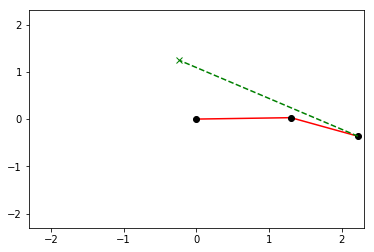

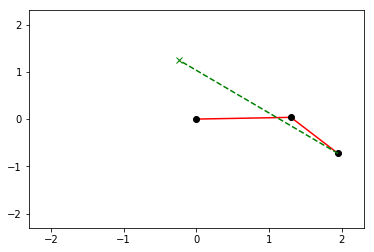

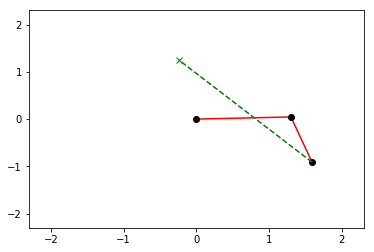

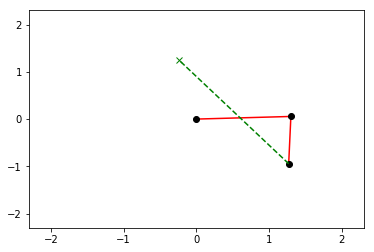

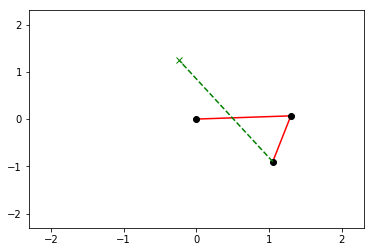

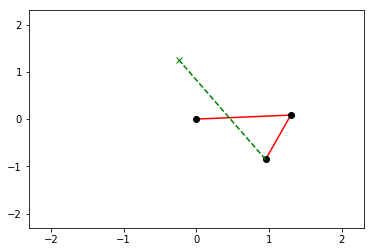

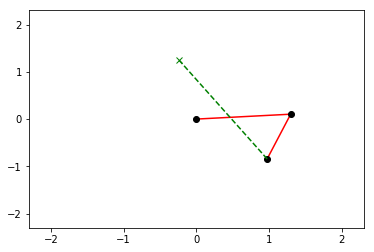

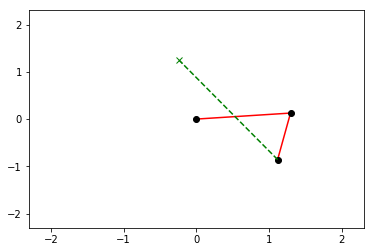

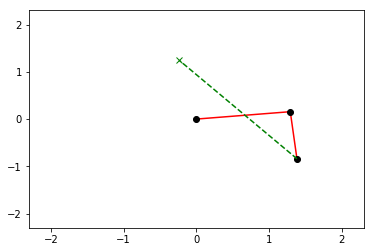

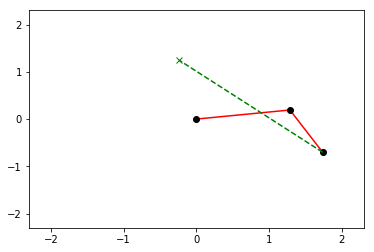

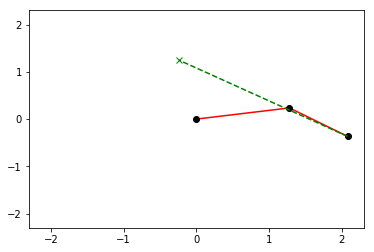

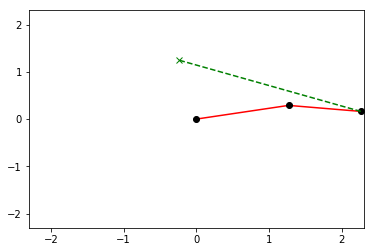

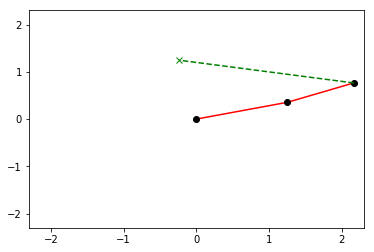

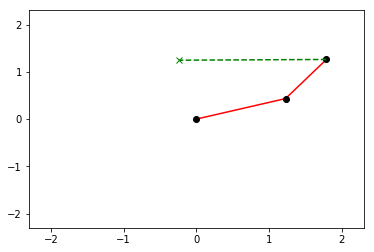

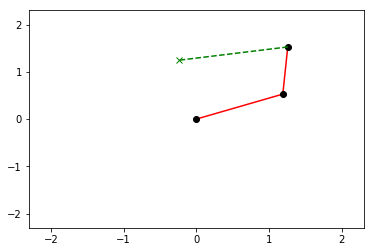

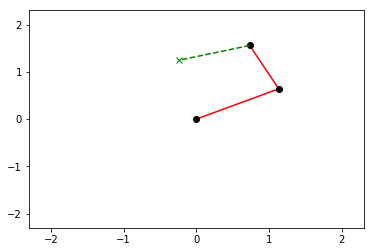

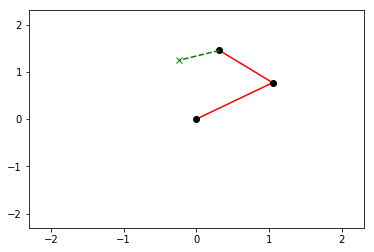

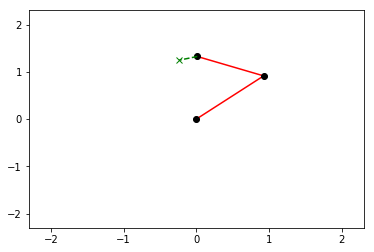

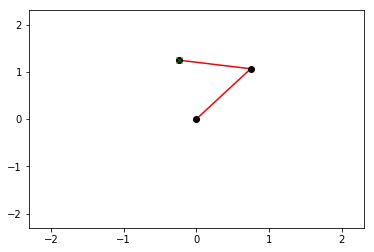

In [13]:
m.playback(data[0:-1:25, :])

In [14]:
# m.playback(data[0:-1:10, :])

In [23]:
oa_data_f = '/home/cloud/code/work/uta-rvl/pyrobot_recorder/trajectories/obs_avoidance_arm_navigation/10_20_2020.txt'

In [27]:
oa_data = np.genfromtxt(oa_data_f, delimiter=',')

In [28]:
oa_data.shape

(79, 2)

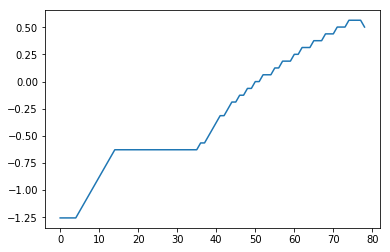

In [31]:
plt.plot(oa_data[:, 0])

In [43]:
N = len(oa_data)
samples = tf*np.arange(N)/N
ntrp_space = np.arange(N*tf)/N

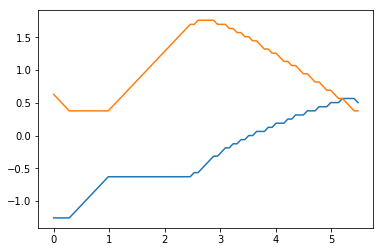

In [36]:
plt.plot(samples, oa_data)

In [65]:
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
from scipy.signal import savgol_filter

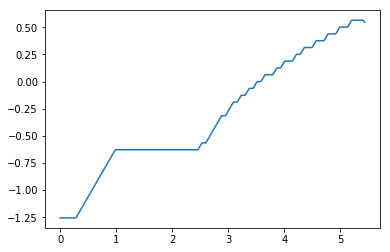

In [62]:
#plt.plot(samples, oa_data[:,0])
plt.plot(ntrp_space[:-9], interp1d(samples, oa_data[:, 0], kind='linear')(ntrp_space[:-9]))

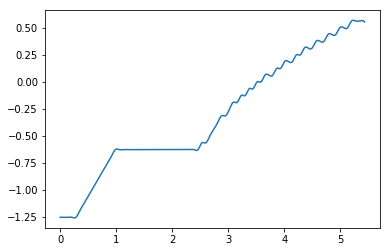

In [64]:
#plt.plot(samples, oa_data[:,0])
plt.plot(ntrp_space[:-9], InterpolatedUnivariateSpline(samples, oa_data[:, 0])(ntrp_space[:-9]))

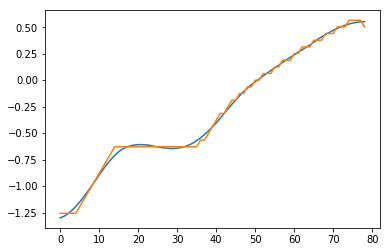

In [71]:
plt.plot(savgol_filter(oa_data[:, 0], 25, 3))
plt.plot(oa_data[:, 0])
plt.show()

In [72]:
savgol_filter(oa_data[:, 0], 25, 3).shape

(79,)

In [73]:
oa_data[:, 0].shape

(79,)

In [83]:
oa_data[0:-1:25, :]

array([[-1.25663706,  0.62831853],
       [-0.62831853,  1.0681415 ],
       [ 0.        ,  1.50796447],
       [ 0.56548668,  0.50265482]])

In [84]:
data[0:-1:25, :]

array([[ 0.        ,  0.01      ,  1.41421356],
       [ 0.25      ,  0.01230524,  1.02036705],
       [ 0.5       ,  0.01514189,  0.56307906],
       [ 0.75      ,  0.01863246,  0.07078154],
       [ 1.        ,  0.02292769, -0.42591683],
       [ 1.25      ,  0.02821308, -0.89613376],
       [ 1.5       ,  0.03471687, -1.31063343],
       [ 1.75      ,  0.04271994, -1.64364426],
       [ 2.        ,  0.05256791, -1.87446125],
       [ 2.25      ,  0.06468608, -1.98873332],
       [ 2.5       ,  0.07959777, -1.97935559],
       [ 2.75      ,  0.09794697, -1.84691111],
       [ 3.        ,  0.12052609, -1.59963464],
       [ 3.25      ,  0.14831025, -1.25290064],
       [ 3.5       ,  0.18249932, -0.82826735],
       [ 3.75      ,  0.2245698 , -0.3521364 ],
       [ 4.        ,  0.27633853,  0.14588868],
       [ 4.25      ,  0.34004119,  0.63484311],
       [ 4.5       ,  0.41842885,  1.08432607],
       [ 4.75      ,  0.51488675,  1.46639089],
       [ 5.        ,  0.6335805 ,  1.757

20201020-162306
None


<Figure size 432x288 with 0 Axes>

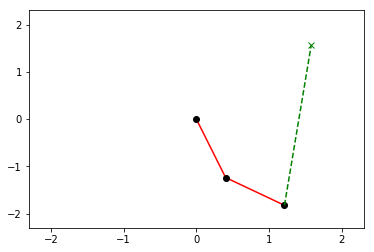

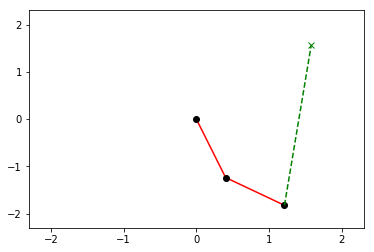

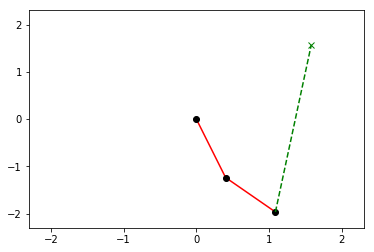

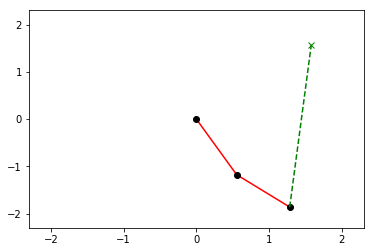

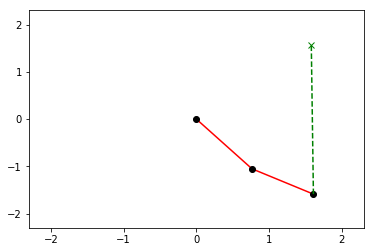

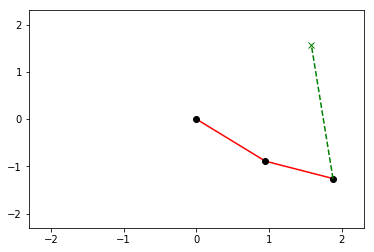

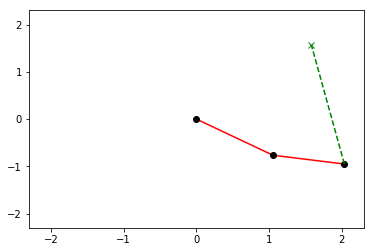

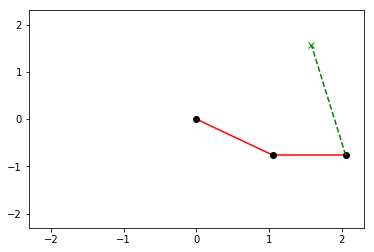

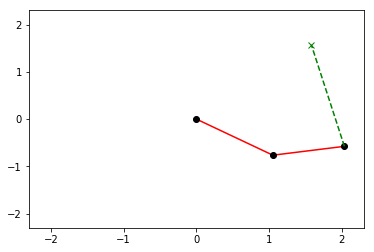

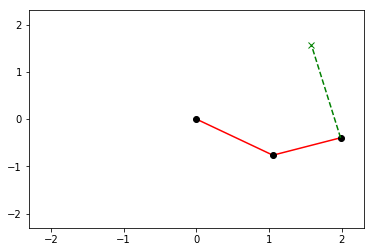

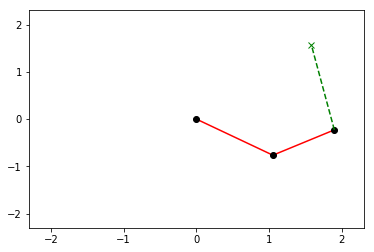

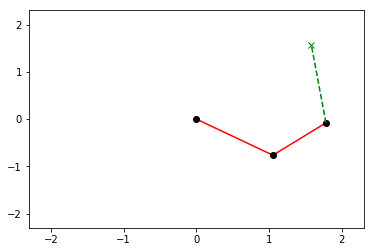

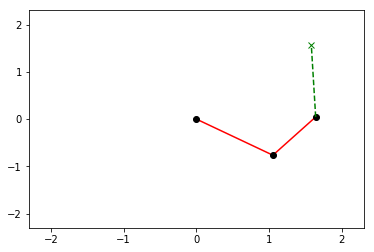

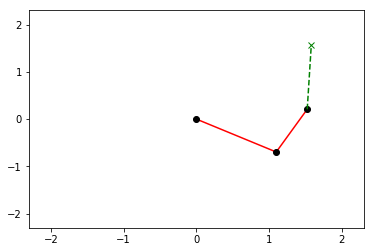

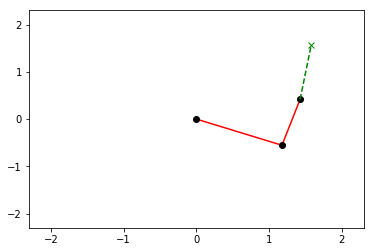

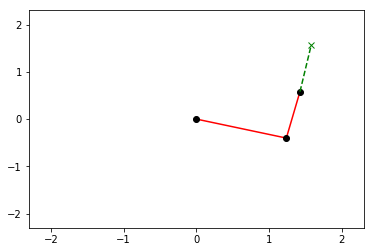

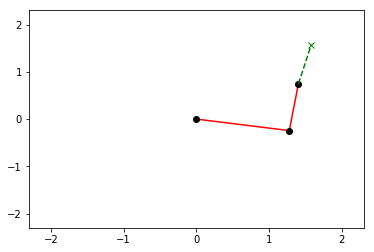

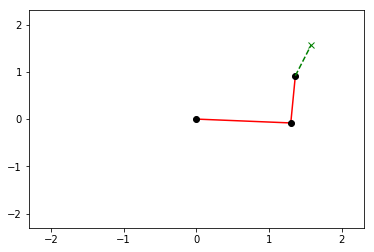

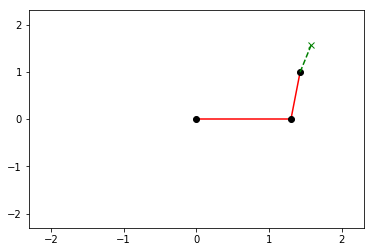

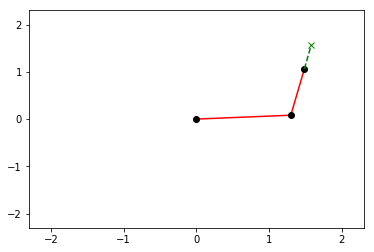

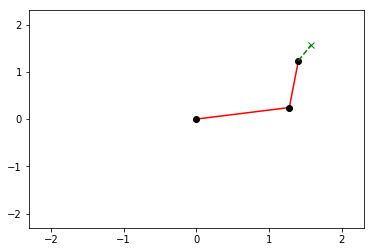

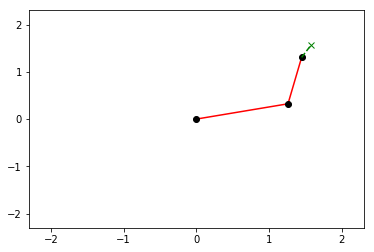

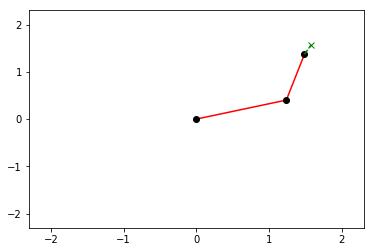

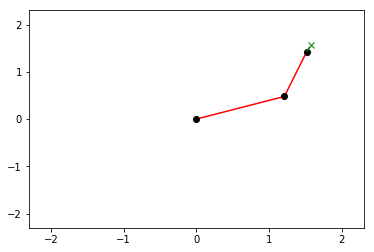

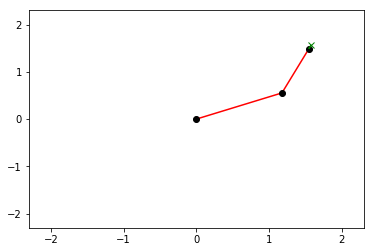

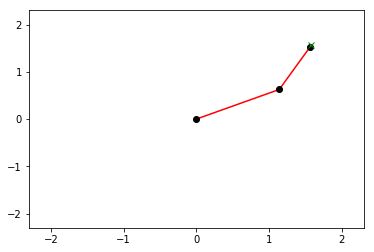

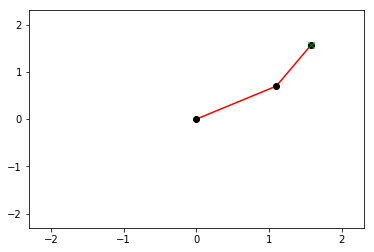

In [91]:
m.playback(np.hstack([samples.reshape(-1, 1), oa_data])[0:-1:3, :])

In [87]:
samples.shape

(79,)

In [88]:
oa_data.shape

(79, 2)

In [105]:
original_data = oa_data
noiseless_data = savgol_filter(original_data, 15, 3, axis=0)

In [114]:
N = len(noiseless_data)
tfinal = 5.5
desired_length = 500
t_original = np.linspace(0, tfinal, num=N, endpoint=True)
t_desired = np.linspace(0, tfinal, num=desired_length, endpoint=True)

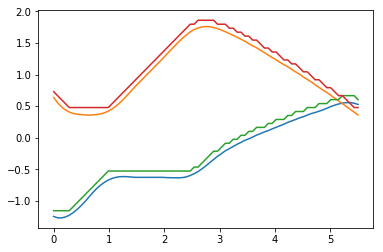

In [115]:
plt.plot(t_original, noiseless_data)
plt.plot(t_original, 0.1 + original_data) # plot with offset for viz
plt.show()

In [118]:
interp_nf_data = interp1d(t_original, noiseless_data, kind='linear', axis=0)(t_desired)

In [119]:
print(interp_nf_data.shape)

(500, 2)


In [122]:
from pyrdmp.dmp import DynamicMovementPrimitive as DMP
from pyrdmp.utils import *

In [123]:

def generate_dmp(traj):
    gain = 20
    num_gaussians = 20
    stabilization = False
    window = 5
    blends = 10
    samples = 10
    rate = 0.5
    my_dmp = DMP(gain, num_gaussians, stabilization)

    t, q = traj[:, 0], traj[:, 1:]

    # Get the phase from the time vector
    s = my_dmp.phase(t)

    # Get the Gaussian
    psv = my_dmp.distributions(s)

    # Normalize the time vector
    t = normalize_vector(t)

    # Compute velocity and acceleration
    dq, ddq = np.zeros((2, q.shape[0], q.shape[1]))

    for i in range(q.shape[1]):
        #q[:, i] = smooth_trajectory(q[:, i], arg.window)
        dq[:, i] = vel(q[:, i], t)
        ddq[:, i] = vel(dq[:, i], t)

    # Filter the position velocity and acceleration signals
    f_q, f_dq, f_ddq = np.zeros((3, q.shape[0], q.shape[1]))

    for i in range(q.shape[1]):
        f_q[:, i] = blend_trajectory(q[:, i], dq[:, i], t, blends)
        f_dq[:, i] = vel(f_q[:, i], t)
        f_ddq[:, i] = vel(f_dq[:, i], t)

    # Imitation Learning
    ftarget = np.zeros(q.shape)
    w = np.zeros((my_dmp.ng, q.shape[1]))

    print('Imitation start')

    for i in range(q.shape[1]):
        ftarget[:, i], w[:, i] = my_dmp.imitate(f_q[:, i], f_dq[:, i], 
                f_ddq[:, i], t, s, psv)

    print('Imitation done')

    # Generate the Learned trajectory
    x, dx, ddx = np.zeros((3, q.shape[0], q.shape[1]))

    def __dmp_goal(goal):
        for i in range(q.shape[1]):
            ddx[:, i], dx[:, i], x[:, i] = my_dmp.generate(w[:, i], f_q[0, i], 
                    goal[i], t, s, psv)
        return np.copy(x)
    return __dmp_goal

In [125]:
tioa_data = np.hstack([t_desired.reshape(-1, 1), interp_nf_data])

In [192]:
dmp = generate_dmp(tioa_data)
gen_trajs = []
for i in range(50):
    goal = np.copy(tioa_data[-1][1:])
    goal += np.random.normal(0, 0.1, goal.shape)
    gen_trajs.append(dmp(goal))
gen_trajs = np.array(gen_trajs)

Imitation start
Imitation done


In [193]:
print(gen_trajs.shape)
dmp_data = gen_trajs.copy()

(50, 500, 2)


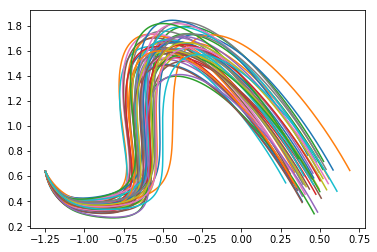

In [194]:
for d in dmp_data:
    plt.plot(d[:, 0], d[:, 1:])
plt.show()

In [204]:
mu = np.mean(dmp_data, axis=0)
w = np.geomspace(0.05, 0.9, len(mu), endpoint=False)

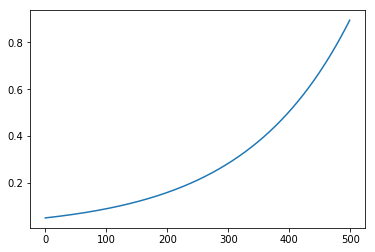

In [205]:
plt.plot(w)
plt.show()

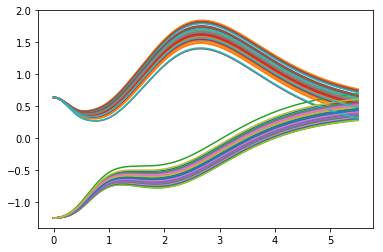

In [206]:
for d in dmp_data:
    plt.plot(t_desired, d)
plt.show()

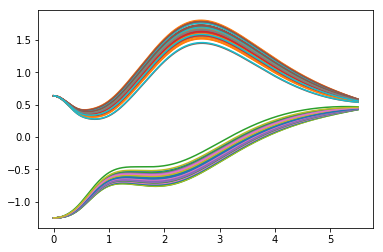

In [227]:
w_dmp_data = []
for d in dmp_data:
    d = (mu.T*w + d.T*(1-w)).T
    w_dmp_data.append(d)
    plt.plot(t_desired, d)
plt.show()

In [223]:
! ls

armnavigation		 requirements.txt  test_n_joint_arm_to_point_control.py
playback_n_joint_arm.py  robotics.ipynb    trajectories
README.md		 screenshots


In [228]:
! mkdir -p trajectories/dmp_gen_traj/

dir_p = 'trajectories/dmp_gen_traj/'

In [229]:
for i in range(len(dmp_data)):
    np.savetxt(dir_p + 'traj-%.3d-gen.csv' % i, np.hstack([t_desired.reshape(-1, 1), w_dmp_data[i]]), delimiter=',')

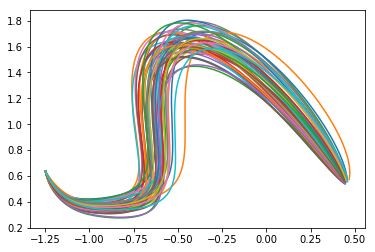

In [230]:
for d in w_dmp_data:
    plt.plot(d[:, 0], d[:, 1:])
plt.show()

In [226]:
! ls trajectories/dmp_gen_traj

traj-000-gen.csv  traj-013-gen.csv  traj-026-gen.csv  traj-039-gen.csv
traj-001-gen.csv  traj-014-gen.csv  traj-027-gen.csv  traj-040-gen.csv
traj-002-gen.csv  traj-015-gen.csv  traj-028-gen.csv  traj-041-gen.csv
traj-003-gen.csv  traj-016-gen.csv  traj-029-gen.csv  traj-042-gen.csv
traj-004-gen.csv  traj-017-gen.csv  traj-030-gen.csv  traj-043-gen.csv
traj-005-gen.csv  traj-018-gen.csv  traj-031-gen.csv  traj-044-gen.csv
traj-006-gen.csv  traj-019-gen.csv  traj-032-gen.csv  traj-045-gen.csv
traj-007-gen.csv  traj-020-gen.csv  traj-033-gen.csv  traj-046-gen.csv
traj-008-gen.csv  traj-021-gen.csv  traj-034-gen.csv  traj-047-gen.csv
traj-009-gen.csv  traj-022-gen.csv  traj-035-gen.csv  traj-048-gen.csv
traj-010-gen.csv  traj-023-gen.csv  traj-036-gen.csv  traj-049-gen.csv
traj-011-gen.csv  traj-024-gen.csv  traj-037-gen.csv
traj-012-gen.csv  traj-025-gen.csv  traj-038-gen.csv


In [ ]:
# ! rm -rf trajectories/dmp_gen_traj/*